In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
from datetime import date, timedelta
%matplotlib inline

Update end date below to the previous day's date

In [2]:
yesterday = date.today() - timedelta(days=1)
yesterday.strftime('%m/%d/%Y')

'09/12/2021'

In [3]:
x = pd.date_range(start='4/12/2020', end=yesterday)
#x = pd.date_range(start='7/12/2021', end='9/08/2021')

In [4]:
date_list = []
for date_value in x.strftime('%m-%d-%Y'):
    date_list.append(date_value)
dt_date_list = pd.to_datetime(pd.Series(date_list))

In [5]:
df_jhu_us_dict= {}
for y in range(len(date_list)):
    url_value = r'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/' + date_list[y] + r'.csv'
    df_jhu_us_dict[date_list[y]] = pd.read_csv(url_value,header=0)
    df_jhu_us_dict[date_list[y]]['dt_date'] = dt_date_list[y]
  #  df_jhu_us_dict[date_list[y]].set_index(['Province_State'],  inplace=True)
    print(date_list[y])

04-12-2020
04-13-2020
04-14-2020
04-15-2020
04-16-2020
04-17-2020
04-18-2020
04-19-2020
04-20-2020
04-21-2020
04-22-2020
04-23-2020
04-24-2020
04-25-2020
04-26-2020
04-27-2020
04-28-2020
04-29-2020
04-30-2020
05-01-2020
05-02-2020
05-03-2020
05-04-2020
05-05-2020
05-06-2020
05-07-2020
05-08-2020
05-09-2020
05-10-2020
05-11-2020
05-12-2020
05-13-2020
05-14-2020
05-15-2020
05-16-2020
05-17-2020
05-18-2020
05-19-2020
05-20-2020
05-21-2020
05-22-2020
05-23-2020
05-24-2020
05-25-2020
05-26-2020
05-27-2020
05-28-2020
05-29-2020
05-30-2020
05-31-2020
06-01-2020
06-02-2020
06-03-2020
06-04-2020
06-05-2020
06-06-2020
06-07-2020
06-08-2020
06-09-2020
06-10-2020
06-11-2020
06-12-2020
06-13-2020
06-14-2020
06-15-2020
06-16-2020
06-17-2020
06-18-2020
06-19-2020
06-20-2020
06-21-2020
06-22-2020
06-23-2020
06-24-2020
06-25-2020
06-26-2020
06-27-2020
06-28-2020
06-29-2020
06-30-2020
07-01-2020
07-02-2020
07-03-2020
07-04-2020
07-05-2020
07-06-2020
07-07-2020
07-08-2020
07-09-2020
07-10-2020
07-11-2020

In [6]:
aaa = df_jhu_us_dict[date_list[0]].loc[df_jhu_us_dict[date_list[0]].Province_State == 'Texas', ['Province_State','Confirmed', 'Deaths', 'dt_date']]
for d_value in date_list[1:]:
    aaa = aaa.append(df_jhu_us_dict[d_value].loc[df_jhu_us_dict[d_value].Province_State == 'Texas', ['Province_State','Confirmed', 'Deaths', 'dt_date']])

In [7]:
aaa

,Province_State,Confirmed,Deaths,dt_date
47,Texas,13780,306,2020-04-12
49,Texas,14328,337,2020-04-13
49,Texas,15088,363,2020-04-14
49,Texas,16044,406,2020-04-15
49,Texas,16985,440,2020-04-16
...,...,...,...,...
49,Texas,3768545,58927,2021-09-08
49,Texas,3793204,59338,2021-09-09
49,Texas,3812711,59742,2021-09-10
49,Texas,3821518,60061,2021-09-11


In [8]:
bbb = aaa.loc[:,['dt_date','Confirmed']]

In [9]:
bbb

,dt_date,Confirmed
47,2020-04-12,13780
49,2020-04-13,14328
49,2020-04-14,15088
49,2020-04-15,16044
49,2020-04-16,16985
...,...,...
49,2021-09-08,3768545
49,2021-09-09,3793204
49,2021-09-10,3812711
49,2021-09-11,3821518


In [10]:
ccc = bbb.set_index('dt_date')

In [11]:
ccc

,Confirmed
dt_date,
2020-04-12,13780
2020-04-13,14328
2020-04-14,15088
2020-04-15,16044
2020-04-16,16985
...,...
2021-09-08,3768545
2021-09-09,3793204
2021-09-10,3812711


In [12]:
ddd = ccc.diff(periods = 1)

In [13]:
ddd

,Confirmed
dt_date,
2020-04-12,NaN
2020-04-13,548.0
2020-04-14,760.0
2020-04-15,956.0
2020-04-16,941.0
...,...
2021-09-08,40882.0
2021-09-09,24659.0
2021-09-10,19507.0


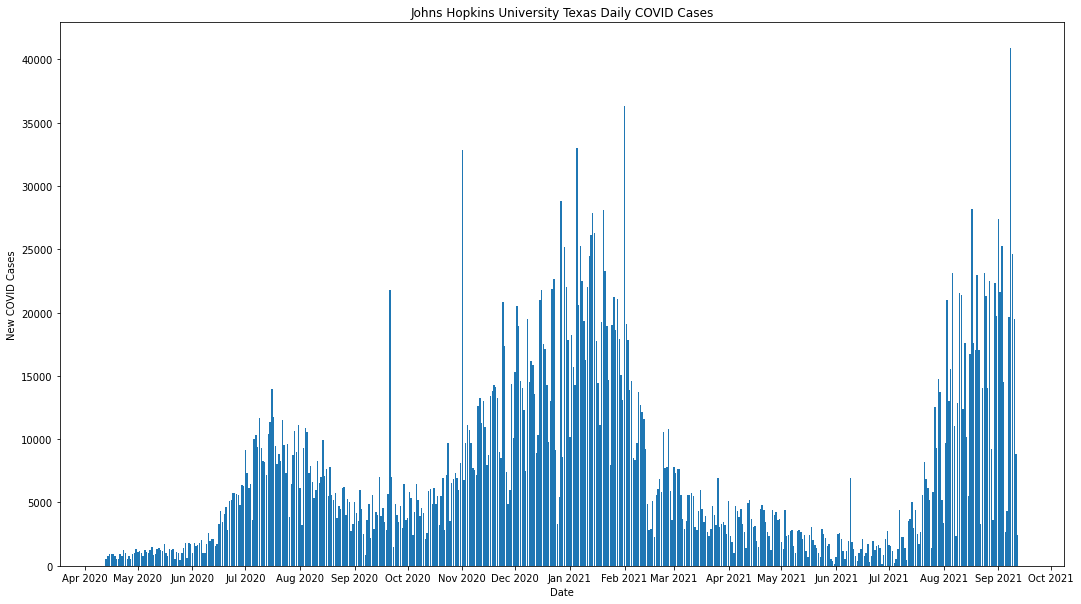

In [14]:
import datetime
import matplotlib.dates as mdates
months = mdates.MonthLocator()
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
fig.set_size_inches(18,10)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
#ax.xaxis.set_minor_locator(months)
plt.title('Johns Hopkins University Texas Daily COVID Cases')
plt.xlabel('Date',color='black')
plt.ylabel('New COVID Cases',color='black')
plt.bar(ddd.index,ddd.Confirmed)
fig.savefig('JHUDailyTexasNew.png')

In [15]:
eee = aaa.loc[:,['dt_date','Deaths']]

In [16]:
fff = eee.set_index('dt_date')

In [17]:
ggg = fff.diff(periods = 1)

In [18]:
ggg

,Deaths
dt_date,
2020-04-12,NaN
2020-04-13,31.0
2020-04-14,26.0
2020-04-15,43.0
2020-04-16,34.0
...,...
2021-09-08,289.0
2021-09-09,411.0
2021-09-10,404.0


In [19]:
hhh= ggg[1:]

In [20]:
hhh

,Deaths
dt_date,
2020-04-13,31.0
2020-04-14,26.0
2020-04-15,43.0
2020-04-16,34.0
2020-04-17,39.0
...,...
2021-09-08,289.0
2021-09-09,411.0
2021-09-10,404.0


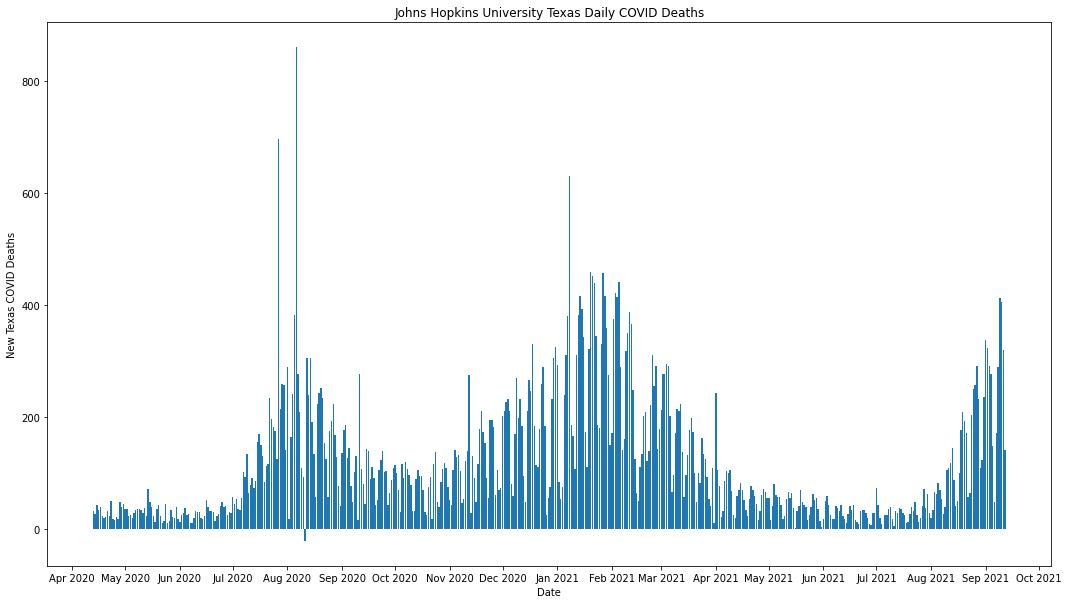

In [21]:
import datetime
import matplotlib.dates as mdates
months = mdates.MonthLocator()
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
fig.set_size_inches(18,10)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
#ax.xaxis.set_minor_locator(months)
plt.title('Johns Hopkins University Texas Daily COVID Deaths')
plt.xlabel('Date',color='black')
plt.ylabel('New Texas COVID Deaths',color='black')
plt.bar(hhh.index, hhh.Deaths)
fig.savefig('JHUDailyTexasDeaths.png')

In [22]:
 df_jhu_us_dict[date_list[0]]

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate,dt_date
0,Alabama,US,2020-04-12 23:18:15,32.3182,-86.9023,3667,93,NaN,3470,1.0,75.988020,21583.0,437.0,2.610160,84000001,USA,460.300152,12.264945,2020-04-12
1,Alaska,US,2020-04-12 23:18:15,61.3707,-152.4044,272,8,66.0,264,2.0,45.504049,8038.0,31.0,2.941176,84000002,USA,1344.711576,11.397059,2020-04-12
2,Arizona,US,2020-04-12 23:18:15,33.7298,-111.4312,3542,115,NaN,3427,4.0,48.662422,52289.0,NaN,3.246753,84000004,USA,578.522286,NaN,2020-04-12
3,Arkansas,US,2020-04-12 23:18:15,34.9697,-92.3731,1280,27,367.0,1253,5.0,49.439423,19722.0,130.0,2.109375,84000005,USA,761.753354,10.156250,2020-04-12
4,California,US,2020-04-12 23:18:15,36.1162,-119.6816,22805,645,NaN,22155,6.0,58.137726,190328.0,5234.0,2.812020,84000006,USA,485.423869,22.961176,2020-04-12
5,Colorado,US,2020-04-12 23:18:15,39.0598,-105.3111,7307,289,NaN,7018,8.0,128.943729,34873.0,1376.0,3.955112,84000008,USA,615.389991,18.831258,2020-04-12
6,Connecticut,US,2020-04-12 23:18:15,41.5978,-72.7554,12035,554,NaN,11481,9.0,337.560482,41220.0,1654.0,4.603241,84000009,USA,1156.148159,13.743249,2020-04-12
7,Delaware,US,2020-04-12 23:18:15,39.3185,-75.5071,1625,49,191.0,1590,10.0,166.878217,11103.0,190.0,2.153846,84000010,USA,1140.214672,11.692308,2020-04-12
8,Diamond Princess,US,2020-04-12 23:18:15,NaN,NaN,49,0,0.0,49,888.0,NaN,NaN,NaN,0.000000,84088888,USA,NaN,NaN,2020-04-12
9,District of Columbia,US,2020-04-12 23:18:15,38.8974,-77.0268,1875,50,493.0,1825,11.0,265.675190,10640.0,NaN,2.666667,84000011,USA,1507.618148,NaN,2020-04-12
